# Deep Learning Homework Solutions 
# <span style="color:red">Do not look at this if you have not completed the homework yet. Do not share this with anyone!</span> 

Greetings. This homework will help you get some familiarity with how machine (deep) learning and neural networks are used in practice. Don't worry if you don't have any coding experience, you just have to make small modifications and copy+paste with helpful hints.

Try to keep the worksheet organized as you will have to submit it at the end. **In addition**, you will need to answer specific numerical/multiple choice questions on **bCourses** so that grading becomes easier. Most of the time there is no single correct answer, it just helps us going through your work faster. You are also free to add comments to this worksheet if you want to clarify/explain what you did, but it's not required.

Some *hints* for how to use this worksheet:
* To _execute_ the code in a cell, press *Ctrl+Enter* or use the little 'Run' icon above
* Sometimes there is no output even if execution is successful, so don't be surprised. If you see In[*] the command is running, if you see In[x], where x is a number it's done. The very first cell block you run might take a while.
* _Be careful_ with the order of executing. If you go in order, nothing unexpected will happen, but if you jump around and execute cell out of order, it might mess things up. If you want to start with a clean slate, go to Kernel -> Restart & Clear Output
* If you leave your workbook and come back later, the python kernel may stop in the meanwhile and it will "forget" everything it has already computed. So you need to rerun all the cells from the beginning. If in doubt, just  go to Kernel -> Restart & Clear Output and rerun each cell.
* To _insert_ a cell use the plus icon or Insert in the menu
* Most of the code (the important parts) are fairly simple. The longer/complicated parts are for plotting. So don't worry if you can't follow those
* Although you are not required to, you can add comments if you want to. There are two ways
  * In a code cell block, start a line with # character
  * You can add a cell block and change it to *Markdown* from *Code* in the dropdown next to the control icons. In a markdown cell, you can just put text and when you hit *Ctrl+Enter* it will format it as text.

## Preliminaries

Let's get started. The following code will just import some libraries. The most important ones are tensorflow and keras. These are the main neural network libraries. The others are useful utilities mostly for plotting and some math/stats shortcuts.

Go ahead and execute the cell below. If you see the version of Tensorflow as a result, all is good.

In [20]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import itertools
tf.logging.set_verbosity(tf.logging.ERROR)
#This is just an example comment
print(tf.__version__)

1.13.1


## Load and Inspect Data

Let's load the data. This is a nice clean dataset used in many tutorials. You can find more info [here](https://www.kaggle.com/zalando-research/fashionmnist). 

The first line points to the data, the second line loads the data. There are four parts to it. It's divided to _train_ and _test_. Within each there are the images and the labels, hence 2x2=4 objects. The third line will display the shape of the training image object. It  should show you (60000,28,28) because there are 60,000 images and each image consist of 28x28 pixels.


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = fashion_mnist.load_data()
mnist_train_images.shape

(60000, 28, 28)



Ok, here is the first task. Create a cell below and try to figure out how many images are in the test set.

### <span style="color:red">__bCourses Question 1:__</span> How many images are in the test set?


In [4]:
mnist_test_images.shape

(10000, 28, 28)

---
Take a look at the first image. Programmers always start indexing at 0 so that's why you have `mnist_train_images[0]` in the code. Each pixel is a number between 0 and 255 representing light or dark (note the images are not colored, we are just showing the pixel intensity with colors here).

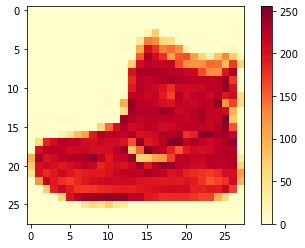

In [5]:
plt.figure()
plt.imshow(mnist_train_images[0],cmap='YlOrRd')
plt.colorbar()
plt.grid(False)

Now let's see what the label of this image is.

In [6]:
mnist_train_labels[0]

9

---
Well, it's 9. Looks like a boot, but we got a number. The reason is that the data we loaded **does not** contain the text labels, just a number for each category. Therefore, we need to manually specify the textual labels in the following code cell. (Note that when you execute the cell, it will not display any output).

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

But with the class names defined, we can easily display the label for the first training image (indexed as 0).

In [8]:
class_names[mnist_train_labels[0]]

'Ankle boot'

---
Ok, now you try. Insert a code cell to display the second training image (just copy and modify the previous code displaying the first image).
### <span style="color:red">__bCourses Question 2:__</span> Upload the second training image (as an image to bCourses)

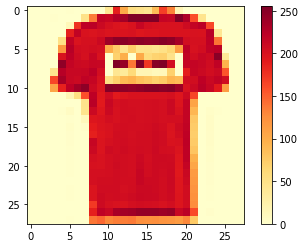

In [9]:
plt.figure()
plt.imshow(mnist_train_images[1],cmap='YlOrRd')
plt.colorbar()
plt.grid(False)

---
Now let's see the label. Create a code cell block to display the label of the second training image.
### <span style="color:red">__bCourses Question 3:__</span> What is the label of the second training image?

In [10]:
class_names[mnist_train_labels[1]]

'T-shirt/top'

---
How about the third one? 
### <span style="color:red">__bCourses Question 4:__</span> What is the label of the third training image?

In [11]:
class_names[mnist_train_labels[2]]

'T-shirt/top'

## Data preprocessing
Cleaning/preprocessing data is usually a gigantic task. This data set that we are using is already very clean and nice, so we just need to complete some very simple steps.

The first one is to normalize the images so that the intensity of a pixel is measured between 0 and 1 and not 0 and 255. (This is not strictly necessary for things to work, but often helps and makes the training faster. Often data is normalized to [-1,1] instead of [0,1]

In [12]:
mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0

---
If you executed the block above, it will not give an output, but let's see if it worked. Let's plot the first image again.

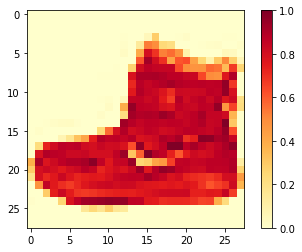

In [13]:
plt.figure()
plt.imshow(mnist_train_images[0],cmap='YlOrRd')
plt.colorbar()
plt.grid(False)

All good. Maximum intensity is now 1.0. Now let's take a look a few more training images (the first 49). Don't worry about the code, it just creates a nice grid of images. Just pay attention to the _last two lines_ where we tell it to display the labels from the `mnist_train_labels` array and the images from the `mnist_train_images` array. The `[i]` means that we want to display the label/image with index `i`, where `i` goes from 0 to 48.

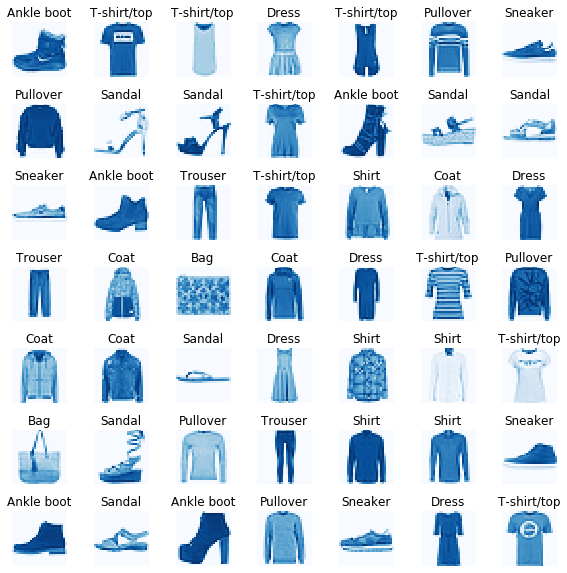

In [14]:
plt.figure(figsize=(10,10))
for i in range(0,49):
    plt.subplot(7,7,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title(class_names[mnist_train_labels[i]])
    plt.imshow(mnist_train_images[i], cmap='Blues')
   

Let's try the same thing for the **test** images. We want to make sure that those look reasonable as well. Create a code cell block to display the first 49 **test** images. *Hint: Copy and modify the code from above and replace the references to the training data with references to the test data in the last two lines (also change 'Blues' to 'Oranges' to make it even nicer)*

### <span style="color:red">__bCourses Question 5:__</span> Upload the test image grid to bCourses
### <span style="color:red">__bCourses Question 6:__</span> What is the label of the first test image?

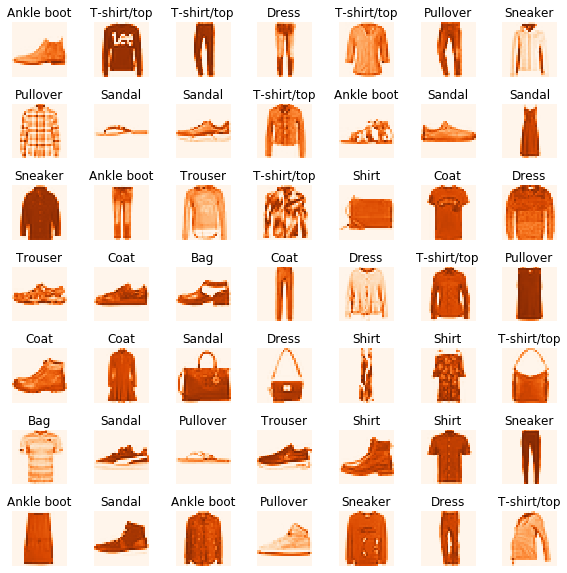

In [15]:
plt.figure(figsize=(10,10))
for i in range(0,49):
    plt.subplot(7,7,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title(class_names[mnist_train_labels[i]])
    plt.imshow(mnist_test_images[i], cmap='Oranges')

One last step before we get to neural networks. Remember, how we want to have more than just training and test data. We want to experiment with different models, so we want to split the training data further and save some of it for validation. That is what the following line of code does. The first line splits the mnist training data into two parts. 80% of it we will actually use for training and 20% for validation. The second line just displays the size of the validation set:

In [16]:
our_train_images, our_val_images, our_train_labels, our_val_labels = train_test_split(mnist_train_images, mnist_train_labels, test_size=12000)
our_val_images.shape

(12000, 28, 28)

---
A simple question: what is the size of the set that we will actually use for training (our training data)? You can use code or just calculate it manually.

### <span style="color:red">__bCourses Question 7:__</span> How many images are in our new training data set, that we will actually use for training? 

In [17]:
our_train_images.shape

(48000, 28, 28)

## Neural Network Setup
Finally! We are ready to set up a neural network. This is where the *keras* library is really useful. It let's you set up a neural network model in just a few steps. 

* The first line below creates an empty network and you add layers one by one. Our first network is super simple. It has two layers: an input layer and an output layer, no hidden layers! 
* The input layer defined in the second line is simply a 28x28=784 dimensional vector, where each dimension corresponds to a pixel in the input image. (The reason the code has the `Flatten` function is because our images are stored as 2D object and this just "flattens" them into a vector). 
* The output layer given in the third line is just 10 nodes, where each node corresponds to one of the categories. The activation levels of these output nodes will give us the prediction. The highest activation is the predicted category. (The 'softmax' activation makes sure that the activations in this layer add up to 1 so the activations are very easy to interpret as a probability of being in the class). This layer is 'dense' because all nodes in the output layer are connected to all nodes in the input layer. 
* The fourth line compiles the model, here is where we specify the loss function, what "optimizer" to use and what metrics to display. You have to do this before training.
* The last line prints a summary of the model (this what provides the output when you run the block)


In [18]:
model1 = keras.Sequential()
model1.add (keras.layers.Flatten(input_shape=(28, 28)))
model1.add (keras.layers.Dense(10,activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Neural Network Setup

Now it's time for training the model. This is the most time consuming part. For this simple network it will be fast, but for more complex ones it can take a while. All you have to specify is the training data (input and output - in our case images and labels and how long it should run. This is what's called epoch. One epoch goes through all the training data once. But you might need to train longer. As long as accuracy improves, it might make sense to run longer. 5 epochs is going to be more than enough for this simple one. *(Note that in the beginning the network is initialized with random weights, so accuracy will start out around 10%, totally random. And it will improve as you train longer. Also note that if you rerun the block by hitting Ctrl+Enter again it will not restart at random, but continue from where it was. So if you have epoch=5 set and run it twice, that's equivalent to epoch=10. But for readability of this notebook try to run only once and set a higher epoch in the final version)*

In [19]:
model1.fit(our_train_images, our_train_labels, epochs=5)

Epoch 1/5
48000/48000 [==============================] - 3s 64us/sample - loss: 0.6303 - acc: 0.7912
Epoch 2/5
48000/48000 [==============================] - 3s 70us/sample - loss: 0.4775 - acc: 0.8389
Epoch 3/5
48000/48000 [==============================] - 4s 75us/sample - loss: 0.4469 - acc: 0.8474
Epoch 4/5
48000/48000 [==============================] - 4s 75us/sample - loss: 0.4311 - acc: 0.8519
Epoch 5/5
48000/48000 [==============================] - 3s 71us/sample - loss: 0.4225 - acc: 0.8555


## Evaluate Results
Now you already see accuracy levels in the output above. Accuracy is simply the percentage of images that are correctly predicted by the model. But those are the accuracy levels in the **training** data. You need to check the performance in the **validation** data. So below, we *evaluate* the model on the validation data (first line) and display the accuracy (second line). (Note: the `model1.evaluate` function also gives the value of loss, but we will ignore that here) 

In [21]:
val_loss1, val_acc1 = model1.evaluate(our_val_images, our_val_labels)
print('Validation accuracy:', val_acc1)

12000/12000 [==============================] - 0s 36us/sample - loss: 0.4141 - acc: 0.8553
Validation accuracy: 0.8553333


## Try Other Networks (Models)
Over 80% accuracy is pretty fascinating! If you think about it, this network (without a hidden layer) is a simple non-linear regression - a multinomial logistic regression to be exact. But let's try to do better. Let's add a hidden layer. In order not to create a mess we'll build a new model from scracth. Let's call this `model2`. The only difference is the addition of a hidden layer in the middle with 128 nodes (and yes, that's number is pretty much ad hoc).

In [22]:
model2 = keras.Sequential()
model2.add (keras.layers.Flatten(input_shape=(28, 28)))
model2.add (keras.layers.Dense(128,activation='sigmoid'))
model2.add (keras.layers.Dense(10,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


---
Let's run this one for 30 epochs.

In [23]:
model2.fit(our_train_images, our_train_labels, epochs=30)

Epoch 1/30
48000/48000 [==============================] - 12s 240us/sample - loss: 0.5788 - acc: 0.8038
Epoch 2/30
48000/48000 [==============================] - 11s 236us/sample - loss: 0.4091 - acc: 0.8510
Epoch 3/30
48000/48000 [==============================] - 11s 233us/sample - loss: 0.3693 - acc: 0.8660
Epoch 4/30
48000/48000 [==============================] - 11s 236us/sample - loss: 0.3431 - acc: 0.8744
Epoch 5/30
48000/48000 [==============================] - 11s 237us/sample - loss: 0.3255 - acc: 0.8796
Epoch 6/30
48000/48000 [==============================] - 11s 231us/sample - loss: 0.3084 - acc: 0.8883
Epoch 7/30
48000/48000 [==============================] - 11s 235us/sample - loss: 0.2954 - acc: 0.8911
Epoch 8/30
48000/48000 [==============================] - 11s 231us/sample - loss: 0.2846 - acc: 0.8958
Epoch 9/30
48000/48000 [==============================] - 11s 236us/sample - loss: 0.2723 - acc: 0.8995 - loss: 0
Epoch 10/30
48000/48000 [=============================

Time for some questions. What is the accuracy on the training set (displayed above)? And what is the accuracy on the validation set? To answer this second question, create a new code cell block below by copying and modifying the cell that gave us the validation accuracy for model 1. Be careful, not to mix up the model numbers.
### <span style="color:red">__bCourses Question 8:__</span> What is the accuracy of model2 on the training set?
### <span style="color:red">__bCourses Question 9:__</span> What is the accuracy of model2 on the validation set?

In [24]:
val_loss2, val_acc2 = model2.evaluate(our_val_images, our_val_labels)
print('Validation accuracy:', val_acc2)

12000/12000 [==============================] - 1s 82us/sample - loss: 0.3179 - acc: 0.8929
Validation accuracy: 0.8929167


### <span style="color:red">__bCourses Question 10:__</span> What is the reason for the difference between the the two accuracy levels? Is the difference a problem, can something be done about it? Briefly comment in free text, but please keep it short, not more than a 100 words.

---
The accuracy levels are not bad, let's see if we can improve by making the network deep. We'll have three hidden layers and add some dropouts as well.


In [28]:
model3 = keras.Sequential()
model3.add (keras.layers.Flatten(input_shape=(28, 28)))
model3.add (keras.layers.Dense(64,activation='sigmoid'))
model3.add(keras.layers.Dropout(rate=0.1))
model3.add (keras.layers.Dense(64,activation='sigmoid'))
model3.add(keras.layers.Dropout(rate=0.1))
model3.add (keras.layers.Dense(64,activation='sigmoid'))
model3.add(keras.layers.Dropout(rate=0.1))
model3.add (keras.layers.Dense(10,activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
__________

-----
We'll try to run this for 40 epochs. If it's too slow, just hit the stop button on the top and retry with a lower number. If it's not taking too long, you can run it even longer, like 100 epochs.

In [29]:
model3.fit(our_train_images, our_train_labels, epochs=40)

Epoch 1/40
48000/48000 [==============================] - 11s 220us/sample - loss: 0.9538 - acc: 0.6597
Epoch 2/40
48000/48000 [==============================] - 10s 209us/sample - loss: 0.5102 - acc: 0.8236
Epoch 3/40
48000/48000 [==============================] - 10s 211us/sample - loss: 0.4542 - acc: 0.8399
Epoch 4/40
48000/48000 [==============================] - 10s 210us/sample - loss: 0.4216 - acc: 0.8513
Epoch 5/40
48000/48000 [==============================] - 10s 213us/sample - loss: 0.3978 - acc: 0.8589
Epoch 6/40
48000/48000 [==============================] - 10s 215us/sample - loss: 0.3807 - acc: 0.8654
Epoch 7/40
48000/48000 [==============================] - 10s 210us/sample - loss: 0.3717 - acc: 0.8681
Epoch 8/40
48000/48000 [==============================] - 10s 214us/sample - loss: 0.3599 - acc: 0.8711
Epoch 9/40
48000/48000 [==============================] - 10s 213us/sample - loss: 0.3494 - acc: 0.8741
Epoch 10/40
48000/48000 [==============================] - 10s 2

### <span style="color:red">__bCourses Question 11:__</span> What is the accuracy of model3 on the training set?
### <span style="color:red">__bCourses Question 12:__</span> What is the accuracy of model3 on the validation set?
Create a new code cell to answer this second questions just as you did for model2.

In [30]:
val_loss3, val_acc3 = model3.evaluate(our_val_images, our_val_labels)

print('Validation accuracy:', val_acc3)

12000/12000 [==============================] - 1s 74us/sample - loss: 0.3134 - acc: 0.8921
Validation accuracy: 0.89208335


Ok that's enough for now. Of course, you are welcome to try other networks (we will not try CNN's here mostly because it would be slow, but the code is fairly simple), but time to pick one of the three models. Which one would you pick out of the three if you had use one in a real application?

### <span style="color:red">__bCourses Question 13:__</span> Which model would you pick for prediction on an unseen data set?

### <span style="color:red">__bCourses Question 14:__</span> Why did you make that choice?

In the following cell block change the code so that it reflects your choice. **Important:** The code will not run if you leave it as `modelx` so change it to either `model1`, `model2`, or `model3`, whichever you picked in your previous answer.

In [31]:
final_model=model2

## Check Performance
Now that we committed to a model, we can now check it's performance on the test data. It is important that we didn't touch the test data before and it didn't influence our model choice, so whatever performance we get on it, we can expect the same on unseen data from the same distribution. The following code block evaluates the accuracy on the test data and stores the predictions for future use.

In [32]:
test_loss, test_acc = final_model.evaluate(mnist_test_images, mnist_test_labels)
predicted_classes = final_model.predict_classes(mnist_test_images)
predictions = final_model.predict(mnist_test_images)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.3562 - acc: 0.8840
Test accuracy: 0.884


---
Some more housekeeping: we separate the correct predictions and the incorrect predictions and display the numbers. These numbers should match the test accuracy above.

In [33]:
correct = np.nonzero(predicted_classes==mnist_test_labels)[0]
incorrect = np.nonzero(predicted_classes!=mnist_test_labels)[0]
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8840
Incorrect predicted classes: 1160


---
We now plot the first 25 correct predictions.

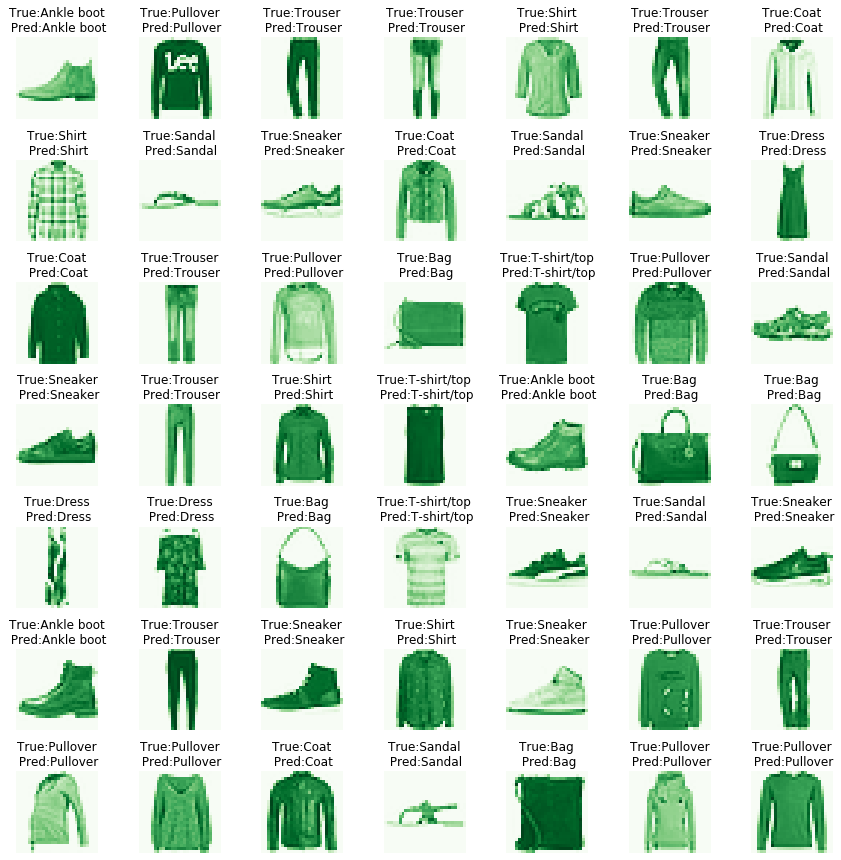

In [34]:
plt.figure(figsize=(15,15))
for i in range(0,49):
    plt.subplot(7,7,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title('True:'+class_names[mnist_test_labels[correct[i]]]+'\n Pred:'+class_names[predicted_classes[correct[i]]])
    plt.imshow(mnist_test_images[correct[i]], cmap='Greens')

---
And the first 25 incorrect predictions:

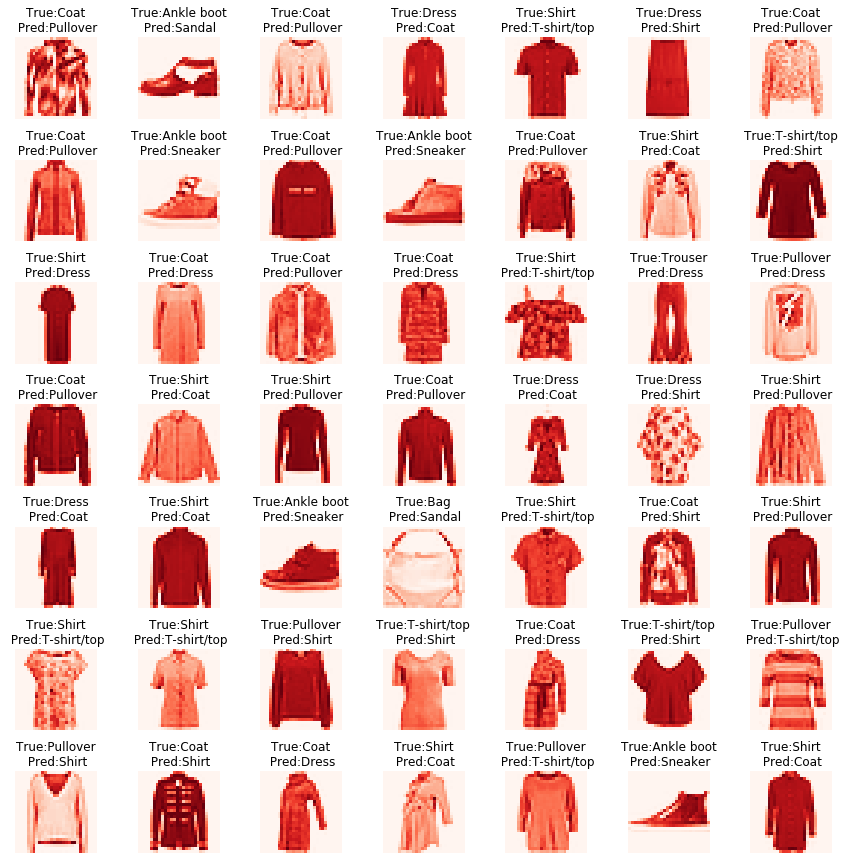

In [35]:
plt.figure(figsize=(15,15))
for i in range(0,49):
    plt.subplot(7,7,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title('True:'+class_names[mnist_test_labels[incorrect[i]]]+'\n Pred:'+class_names[predicted_classes[incorrect[i]]])
    plt.imshow(mnist_test_images[incorrect[i]], cmap='Reds')

---
Let's take a look at the first incorrect prediction (index = 0). The first column shows the probability of the image being in each of the 10 categories.

In [36]:
index = 0
print('True Class of incorrect image '+str(index)+' is '+class_names[mnist_test_labels[incorrect[index]]])
print('Predictions:')
for i in range(10):
    print("{:06.2%}".format(predictions[incorrect[index]][i])+': '+class_names[i]+'')

True Class of incorrect image 0 is Coat
Predictions:
00.15%: T-shirt/top
00.00%: Trouser
96.02%: Pullover
00.00%: Dress
03.76%: Coat
00.00%: Sandal
00.02%: Shirt
00.00%: Sneaker
00.05%: Bag
00.00%: Ankle boot


---
A nice way to see what categories are confused with each other is to display the "confusion" matrix. The code is long mostly to make the image nice.

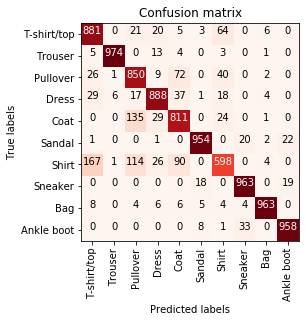

In [37]:
def plot_confusion_matrix(cm,class_,title='Confusion matrix',cmap=plt.cm.Reds):
    """
    This function plots a confusion matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()
    
plot_confusion_matrix(confusion_matrix(mnist_test_labels, predicted_classes), class_names)    

Which image category does the model perform the worst on? In other words which image category is recognized in the lowest proportion? (Hint: All rows add up to 1000, so you don't have to wrry about calculating percentages)? Which category is it confused with the most?

### <span style="color:red">__bCourses Question 15:__</span> Which category does the model recognize the least?
### <span style="color:red">__bCourses Question 16:__</span> Which category is the above confused with the most?

Now let's say you don't mind if these two are confused, it's not a big deal and you just merge the two categories. How much is the accuracy of our current model if you merge these two categories? (Hint: you can calculate this manually just by looking at the confusion matrix numbers, no need for more code).

### <span style="color:red">__bCourses Question 17:__</span> What is the accuracy of our current model on the test data if we merge the above two categories?

(Note: If we were really going to merge, it would be advisable to retrain the model with the merged categories. And it would have been better to do this before touching the test data)

One last thing we'll do is take a look at the images that are model does the worst on (really horribly). The code below just creates a new list with the performance numbers on the incorrectly classified images and displays these numbers for the 3 worst (classified by something else with close to 100% probability).


In [38]:
incorrect_list=[]
for i in incorrect:
    incorrect_list.append({'index':i,
                        'pred_class':predicted_classes[i],
                        'true_class':mnist_test_labels[i],
                        'pred_prob_top':predictions[i][predicted_classes[i]],
                        'pred_prob_true':predictions[i][mnist_test_labels[i]]
                       })     
incorrect_list.sort(key=lambda x: x['pred_prob_top'], reverse= True)  
incorrect_list[:3]

[{'index': 3919,
  'pred_class': 8,
  'true_class': 0,
  'pred_prob_top': 0.99999225,
  'pred_prob_true': 5.1196052e-06},
 {'index': 6596,
  'pred_class': 8,
  'true_class': 6,
  'pred_prob_top': 0.9999893,
  'pred_prob_true': 5.129061e-06},
 {'index': 3487,
  'pred_class': 9,
  'true_class': 5,
  'pred_prob_top': 0.99995065,
  'pred_prob_true': 4.900966e-05}]

We now display the 25 worst images. Why don't you try to classify these with your own eyes? Or even better ask someone else if somebody is around. Take a screenshot of the image grid and put a label on each (one of the 10 of our labels of course). And please don't cheat, you could easily look up the correct labels, but what's the fun in that (how well you classify here is obviously not part of the grade).

### <span style="color:red">__bCourses Question 18:__</span> Upload the image grid to bCourses after manually classifying the images (use your eyes only). Upload as an image and draw/write the labels on them.

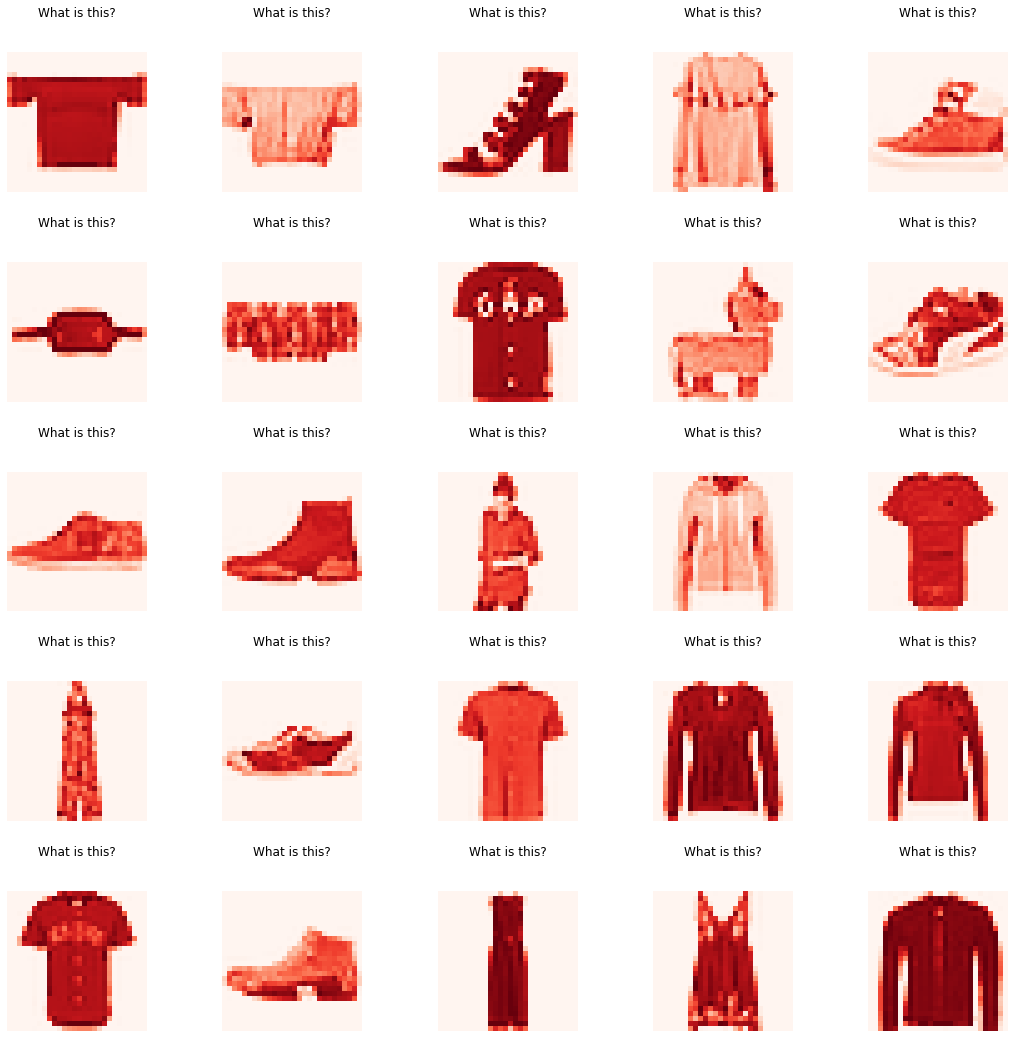

In [39]:
plt.figure(figsize=(18,18))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title('What is this?\n \n ')
    plt.imshow(mnist_test_images[incorrect_list[i]['index']], cmap='Reds')

---
Now let's display the predicted and true labels. And for the fun part: how did you do?

### <span style="color:red">__bCourses Question 19:__</span> Out of the 25, how many times did you get the True label?
### <span style="color:red">__bCourses Question 20:__</span> Out of the 25, how many times did you get the Predicted label?

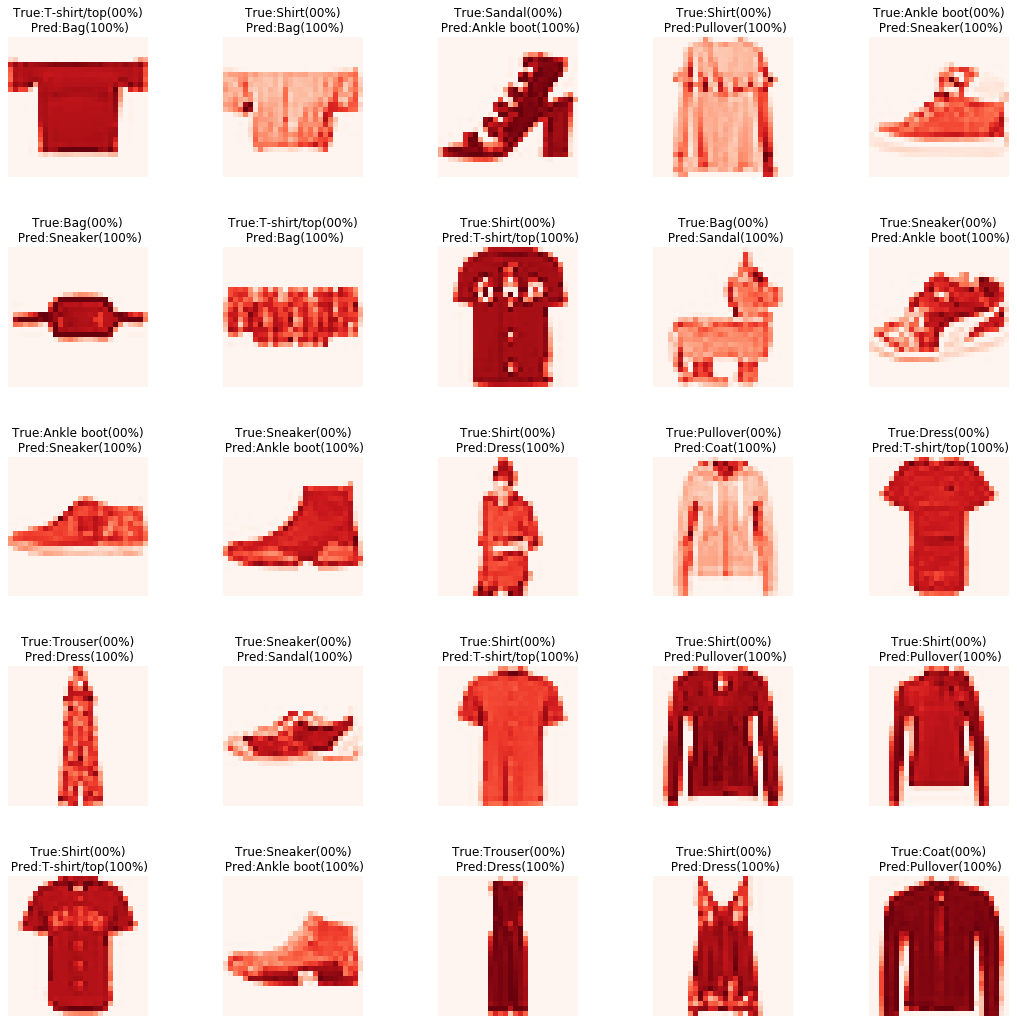

In [40]:
plt.figure(figsize=(18,18))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title('True:'+class_names[incorrect_list[i]['true_class']]+
              "({:03.0%})".format(incorrect_list[i]['pred_prob_true'])+'\n Pred:'+
              class_names[incorrect_list[i]['pred_class']]+
              "({:03.0%})".format(incorrect_list[i]['pred_prob_top']))
    plt.imshow(mnist_test_images[incorrect_list[i]['index']], cmap='Reds')

----
That's it, we're done! One more **important** step. Please download this file as an .ipynb notebook and also as a .pdf (as a backup). To download go to the Menu and File -> Download As.

Name the files as lastname_firstname.ipynb and lastname_firstname.pdf

### <span style="color:red">__bCourses Question 21:__</span> Upload the lastname_firstname.ipynb file
### <span style="color:red">__bCourses Question 22:__</span> Upload the lastname_firstname.pdf file

In [36]:
#change how image pixels are arranged for CNN (this just a convention)
our_train_images = our_train_images.reshape(our_train_images.shape[0],28,28,1).astype('float32')
our_val_images = our_val_images.reshape(our_val_images.shape[0],28,28,1).astype('float32')
mnist_test_images = mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1).astype('float32')


In [37]:
model4 = keras.Sequential()
model4.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model4.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model4.add(keras.layers.Dropout(0.25))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(128, activation='relu'))
#model4.add(keras.layers.Dropout(0.5))
model4.add(keras.layers.Dense(10, activation='softmax'))

model4.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model4.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [38]:
train_model4 = model4.fit(our_train_images, our_train_labels, epochs=25, validation_data=(our_val_images,our_val_labels))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 35s 730us/step - loss: 0.3945 - acc: 0.8582 - val_loss: 0.2964 - val_acc: 0.8922
Epoch 2/25
48000/48000 [==============================] - 34s 707us/step - loss: 0.2460 - acc: 0.9093 - val_loss: 0.2584 - val_acc: 0.9058
Epoch 3/25
48000/48000 [==============================] - 34s 704us/step - loss: 0.1899 - acc: 0.9304 - val_loss: 0.2428 - val_acc: 0.9148
Epoch 4/25
48000/48000 [==============================] - 34s 701us/step - loss: 0.1440 - acc: 0.9464 - val_loss: 0.2607 - val_acc: 0.9142
Epoch 5/25
48000/48000 [==============================] - 34s 704us/step - loss: 0.1089 - acc: 0.9597 - val_loss: 0.2423 - val_acc: 0.9222
Epoch 6/25
48000/48000 [==============================] - 34s 704us/step - loss: 0.0781 - acc: 0.9708 - val_loss: 0.2867 - val_acc: 0.9171
Epoch 7/25
48000/48000 [==============================] - 34s 706us/step - loss: 0.0583 - acc: 0.9784 - val_loss: 0.

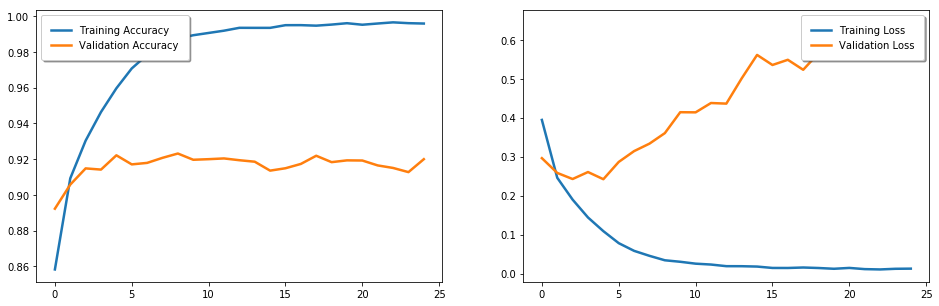

In [39]:
fig, (pn1, pn2) = plt.subplots(1, 2)
pn1.plot(train_model4.history['acc'],linewidth=2.5)
pn1.plot(train_model4.history['val_acc'],linewidth=2.5)
pn1.legend(['Training Accuracy','Validation Accuracy'], loc='upper left',framealpha=1, shadow=True, borderpad=1)
pn2.plot(train_model4.history['loss'],linewidth=2.5)
pn2.plot(train_model4.history['val_loss'],linewidth=2.5)
pn2.legend(['Training Loss','Validation Loss'], loc='upper right',framealpha=1, shadow=True, borderpad=1)
fig.set_size_inches(16, 5)
plt.show()

In [40]:
model4.evaluate(mnist_test_images, mnist_test_labels)[1]

10000/10000 [==============================] - 2s 212us/step


0.916

In [41]:
model4b = keras.Sequential()
model4b.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model4b.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model4b.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4b.add(keras.layers.Dropout(0.25))
model4b.add(keras.layers.Flatten())
model4b.add(keras.layers.Dense(128, activation='relu'))
model4b.add(keras.layers.Dropout(0.5))
model4b.add(keras.layers.Dense(10, activation='softmax'))

model4b.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model4b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [42]:
train_model4b = model4b.fit(our_train_images, our_train_labels, epochs=25, validation_data=(our_val_images,our_val_labels))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 36s 754us/step - loss: 0.5019 - acc: 0.8199 - val_loss: 0.3072 - val_acc: 0.8870
Epoch 2/25
48000/48000 [==============================] - 36s 741us/step - loss: 0.3386 - acc: 0.8790 - val_loss: 0.2718 - val_acc: 0.9014
Epoch 3/25
48000/48000 [==============================] - 35s 735us/step - loss: 0.2846 - acc: 0.8974 - val_loss: 0.2424 - val_acc: 0.9096
Epoch 4/25
48000/48000 [==============================] - 36s 742us/step - loss: 0.2531 - acc: 0.9083 - val_loss: 0.2306 - val_acc: 0.9159
Epoch 5/25
48000/48000 [==============================] - 36s 740us/step - loss: 0.2248 - acc: 0.9175 - val_loss: 0.2297 - val_acc: 0.9182
Epoch 6/25
48000/48000 [==============================] - 36s 741us/step - loss: 0.2062 - acc: 0.9224 - val_loss: 0.2279 - val_acc: 0.9167
Epoch 7/25
48000/48000 [==============================] - 35s 738us/step - loss: 0.1861 - acc: 0.9321 - val_loss: 0.

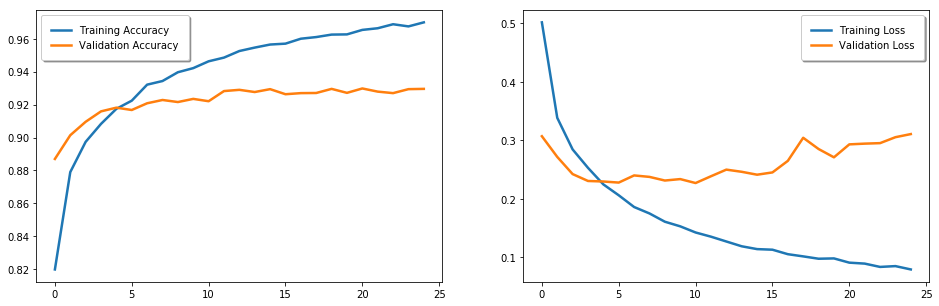

In [43]:
fig, (pn1, pn2) = plt.subplots(1, 2)
pn1.plot(train_model4b.history['acc'],linewidth=2.5)
pn1.plot(train_model4b.history['val_acc'],linewidth=2.5)
pn1.legend(['Training Accuracy','Validation Accuracy'], loc='upper left',framealpha=1, shadow=True, borderpad=1)
pn2.plot(train_model4b.history['loss'],linewidth=2.5)
pn2.plot(train_model4b.history['val_loss'],linewidth=2.5)
pn2.legend(['Training Loss','Validation Loss'], loc='upper right',framealpha=1, shadow=True, borderpad=1)
fig.set_size_inches(16, 5)
plt.show()

In [44]:
model4b.evaluate(mnist_test_images, mnist_test_labels)

10000/10000 [==============================] - 2s 213us/step


[0.3124888558387756, 0.9273]

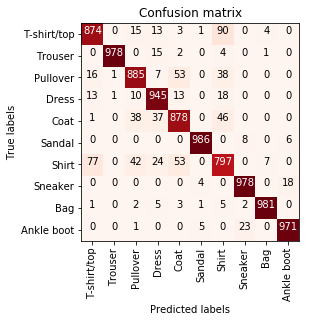

In [45]:
predicted_classes = model4b.predict_classes(mnist_test_images)
predictions = model4b.predict(mnist_test_images)
plot_confusion_matrix(confusion_matrix(mnist_test_labels, predicted_classes), class_names)  

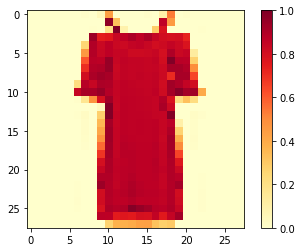

In [46]:
imageindex=0
layer_outputs = [layer.output for layer in model4b.layers]
activation_model = keras.models.Model(inputs=model4b.input, outputs=layer_outputs)
activations = activation_model.predict(our_train_images[imageindex].reshape(1,28,28,1))
plt.figure()
plt.imshow(our_train_images[imageindex].reshape(28,28),cmap='YlOrRd')
plt.colorbar()
plt.grid(False)

In [47]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='YlOrRd')
            activation_index += 1

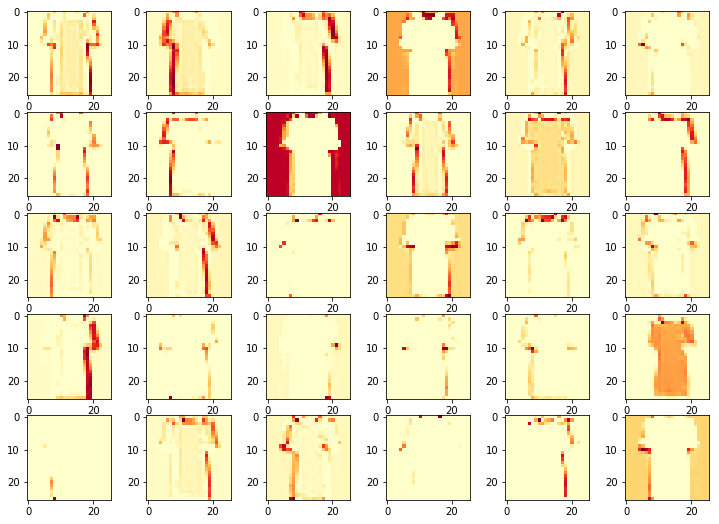

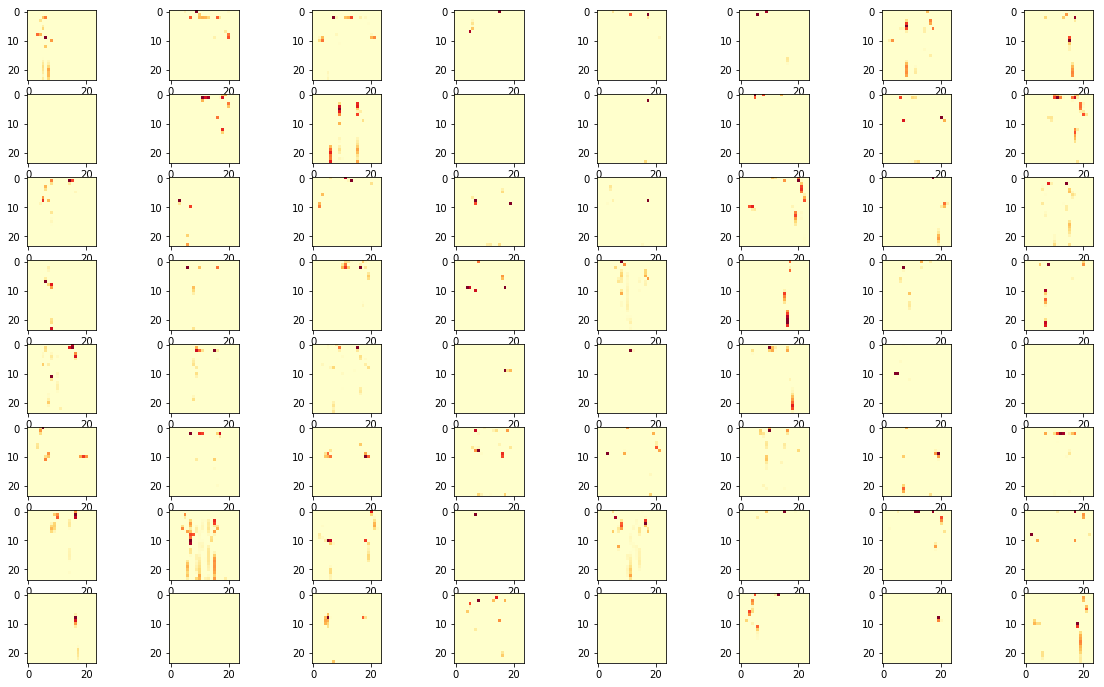

In [48]:
display_activation(activations, 6, 5, 0)
display_activation(activations, 8, 8, 1)

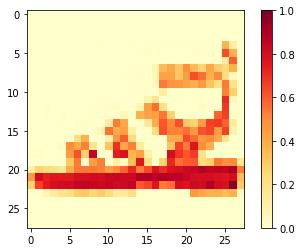

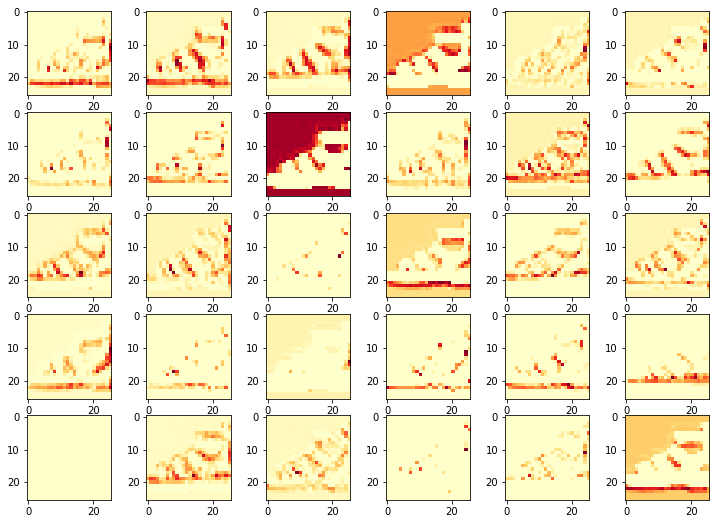

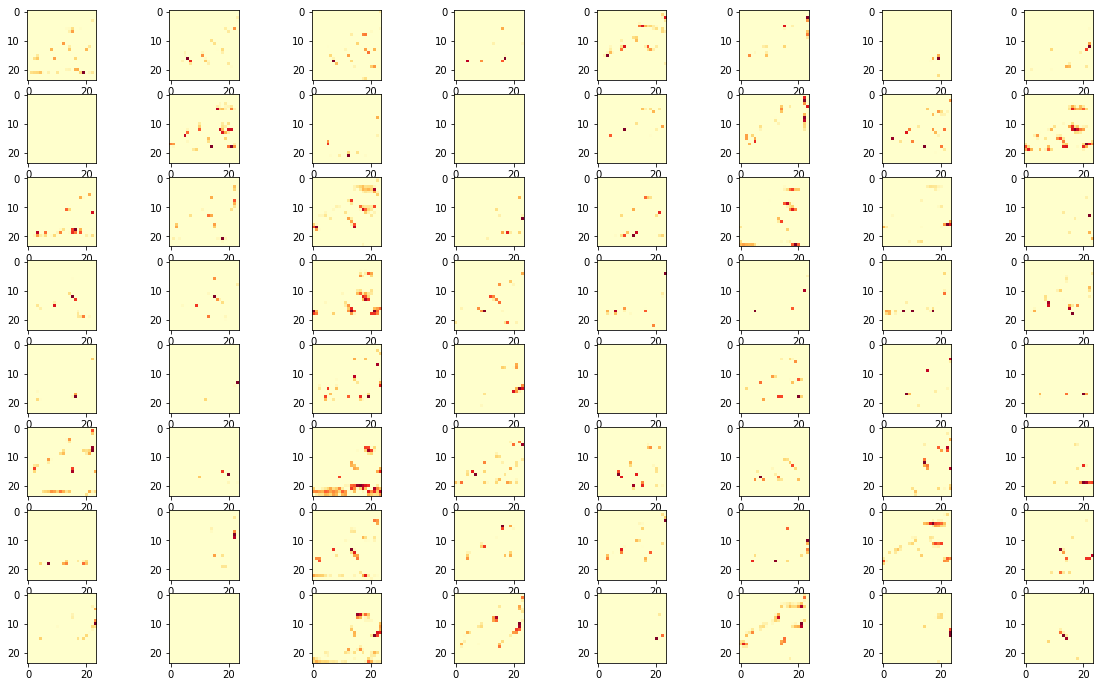

In [49]:
imageindex=1
layer_outputs = [layer.output for layer in model4b.layers]
activation_model = keras.models.Model(inputs=model4b.input, outputs=layer_outputs)
activations = activation_model.predict(our_train_images[imageindex].reshape(1,28,28,1))
plt.figure()
plt.imshow(our_train_images[imageindex].reshape(28,28),cmap='YlOrRd')
plt.colorbar()
plt.grid(False)
display_activation(activations, 6, 5, 0)
display_activation(activations, 8, 8, 1)

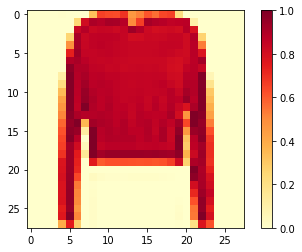

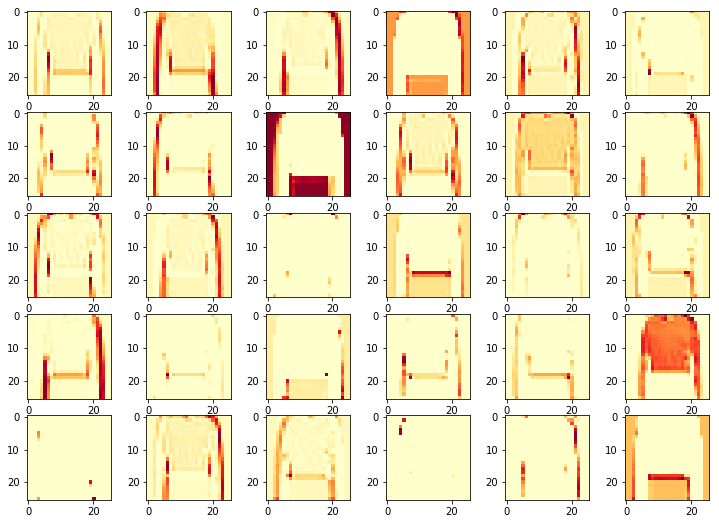

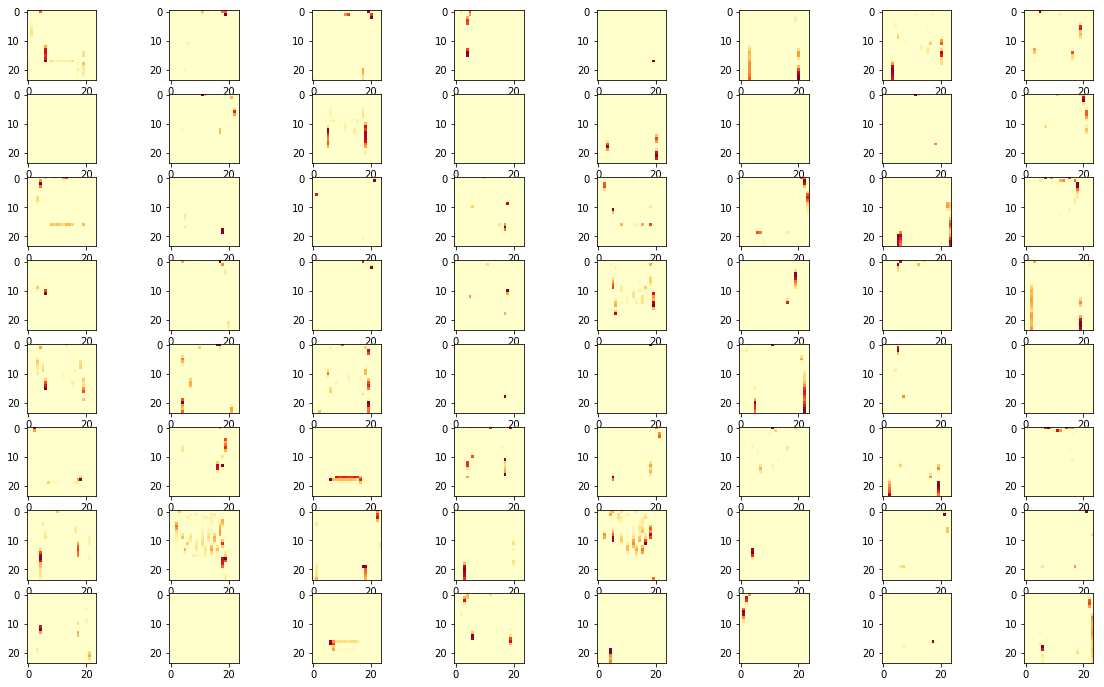

In [50]:
imageindex=2
layer_outputs = [layer.output for layer in model4b.layers]
activation_model = keras.models.Model(inputs=model4b.input, outputs=layer_outputs)
activations = activation_model.predict(our_train_images[imageindex].reshape(1,28,28,1))
plt.figure()
plt.imshow(our_train_images[imageindex].reshape(28,28),cmap='YlOrRd')
plt.colorbar()
plt.grid(False)
display_activation(activations, 6, 5, 0)
display_activation(activations, 8, 8, 1)

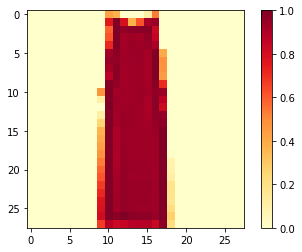

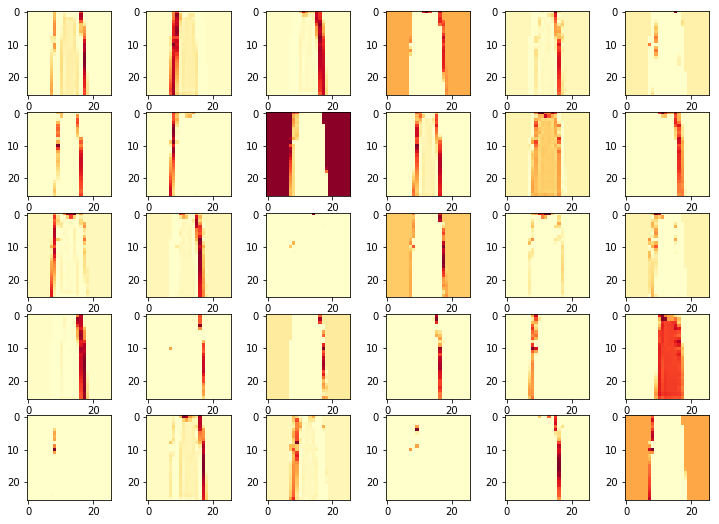

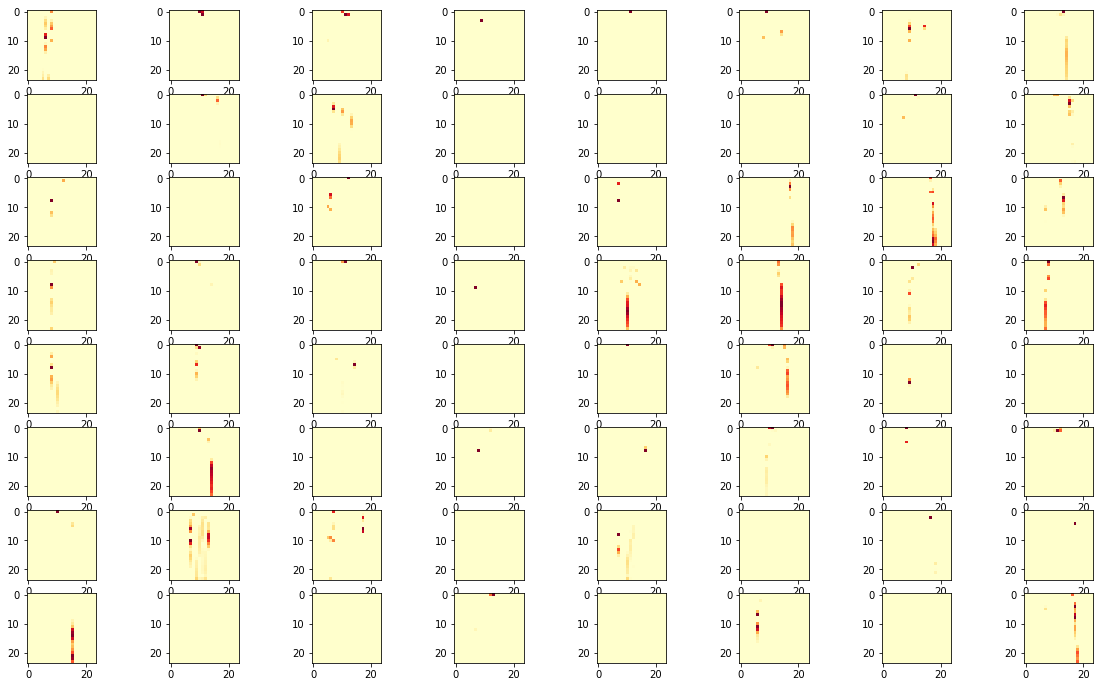

In [51]:
imageindex=3
layer_outputs = [layer.output for layer in model4b.layers]
activation_model = keras.models.Model(inputs=model4b.input, outputs=layer_outputs)
activations = activation_model.predict(our_train_images[imageindex].reshape(1,28,28,1))
plt.figure()
plt.imshow(our_train_images[imageindex].reshape(28,28),cmap='YlOrRd')
plt.colorbar()
plt.grid(False)
display_activation(activations, 6, 5, 0)
display_activation(activations, 8, 8, 1)

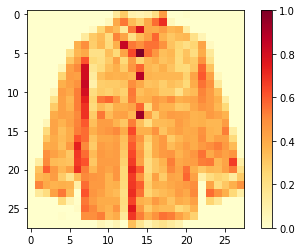

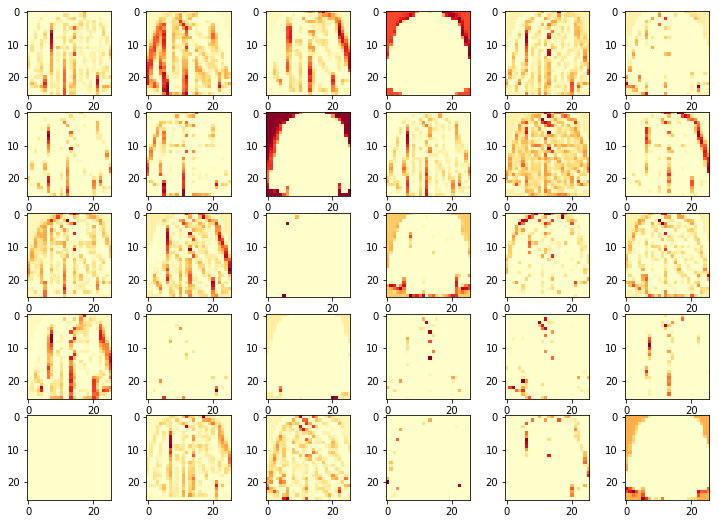

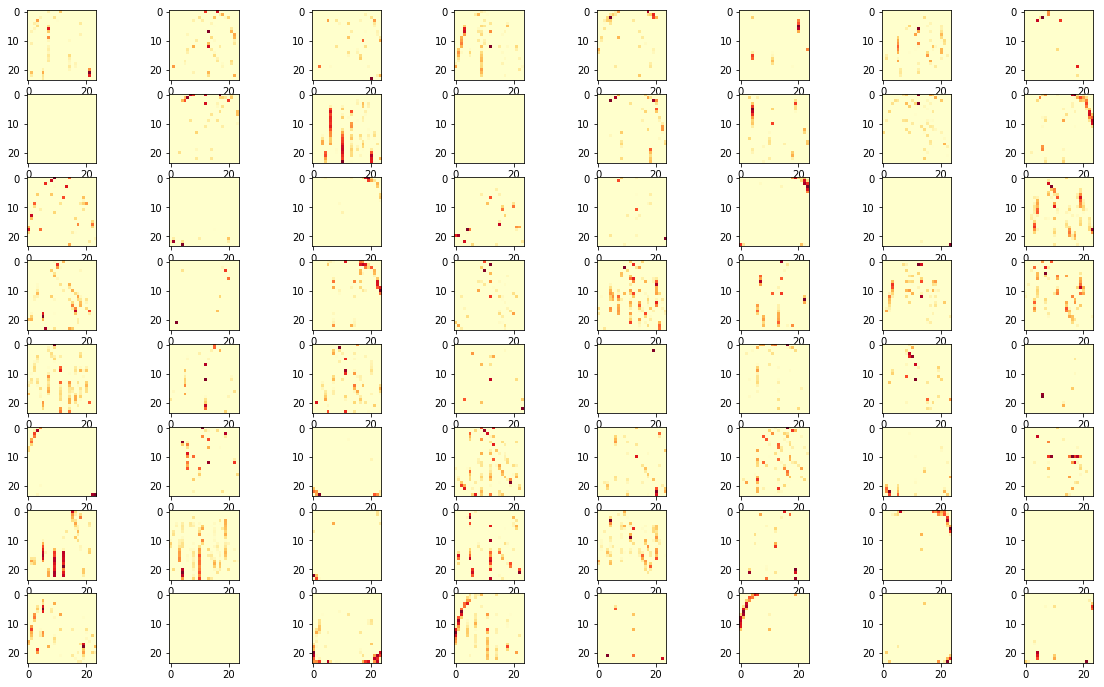

In [52]:
imageindex=4
layer_outputs = [layer.output for layer in model4b.layers]
activation_model = keras.models.Model(inputs=model4b.input, outputs=layer_outputs)
activations = activation_model.predict(our_train_images[imageindex].reshape(1,28,28,1))
plt.figure()
plt.imshow(our_train_images[imageindex].reshape(28,28),cmap='YlOrRd')
plt.colorbar()
plt.grid(False)
display_activation(activations, 6, 5, 0)
display_activation(activations, 8, 8, 1)

In [53]:
model4b.layers[0].get_weights()[0]

array([[[[ 3.28921974e-01, -1.87628731e-01,  8.62593949e-02,
          -1.12388633e-01, -3.44197124e-01, -3.82878125e-01,
           2.51487911e-01, -1.85206905e-01, -1.55734158e+00,
           9.19496864e-02,  1.24044474e-02,  1.31303922e-03,
          -3.07998836e-01,  3.23623359e-01, -2.65119135e-01,
           2.12082535e-01,  1.82028264e-01,  1.19327992e-01,
           1.04403496e-01,  3.40373553e-02,  1.39311612e-01,
          -1.75526157e-01,  2.16221988e-01,  2.16462389e-01,
          -2.38008410e-01,  2.13050693e-02, -1.95996106e-01,
          -1.69407517e-01,  5.13109192e-02, -5.94520830e-02,
           1.62271753e-01, -5.02018154e-01]],

        [[ 1.52895004e-02,  2.71801084e-01, -1.98064953e-01,
          -1.86570883e+00,  3.71054202e-01,  2.05172405e-01,
           3.50772515e-02, -3.45980287e-01,  5.89782819e-02,
           3.22096407e-01, -3.87721837e-01, -2.68274903e-01,
          -2.53987908e-01, -1.46367833e-01, -3.32649142e-01,
           1.61117747e-01, -1.78972110